# ch05.07. 기초모델 구현 - Logistic Regression
---
* 날짜:
* 이름:

## 학습내용
    - 로지스틱 회귀 프로세스 이해
        - 손실함수
        - 손실함수 미분 (최적화)
       
    - 시그모이드 함수를 구현한다
    - 로지스틱 

```
import numpy as np
import matplotlib.pyplot as plt
```

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## 클래스 작성
---

In [211]:
class LogisticRegressionGD():
    
    # 하이퍼 파라미터: 학습률
    def __init__(self, lr=0.001, random_state=1):
        self.lr=lr
        self.seed = np.random.RandomState(random_state)
        
    # 가중치 설정
    def init_weights(self, X):
        size = X.shape[1] # size = X의 피쳐수 
        self.w = self.seed.normal(0,0.01, size = size+1) # size = size+1, 그 값은 평균 0 정규분포
        
    # 예측 model
    def sig_model(self, X):
        z = np.dot(X, self.w[:-1]) + self.w[-1] # Linear 
        return 1/(1+np.exp(-z)) # sigmoid -> 
    
    # 예측
    def predict(self, X):
        y_hat = self.sig_model(X) # 예측값
        logit = np.where(y_hat >= 0.5, 1, 0) # 0.5 기준 1, 0
        return logit
    
    # 평가
    def evaluate(self, X, y):
        y_hat = self.sig_model(X) # 예측값
        y_logit = self.predict(X)
        loss = self.loss(y,y_hat) # loss 값
        acc = self.accuracy(y,y_logit) # accuarcy 값
        return loss, acc
    
    # 손실함수
    def loss(self, y, y_hat):
        loss = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
        N = len(loss)
        L = -np.sum(loss)/N
        return L
    
    # 정확도
    def accuracy(self, y, y_logit):
        return np.count_nonzero(y==y_logit)/len(y)
        # y,ylogit이 같으면 1, 아니면 0, 1의 개수를 count 후 len(y)를 나누어 백분율
    
    # 최적화
    def fit(self, X, y, epochs=10, show_params=False):
        self.init_weights(X) # 가중치 설정
        self.history=dict(loss=[], acc=[]) # loss, acc 값 history.dict 설정
        N = X.shape[0] # N = X의 데이터 개수
        
        for epoch in range(epochs):
            # 최적화
            y_hat = self.sig_model(X) # 예측값
            
            self.w[:-1] += self.lr*np.dot(X.T , (y-y_hat))/N # 경사하강법에 따른 가중치 설정
            self.w[-1] += self.lr*np.sum(y-y_hat)/N  # 편차_bias(b) 값
            
            # 평가 및 결과 저장
            loss, acc = self.evaluate(X, y)
            self.history['loss'].append(loss)
            self.history['acc'].append(acc)
            print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
            if show_params: print(self.w)
    
    # 데이터 흐름 시각화
    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)

        y_hat = self.sig_model(X)
        y_pred = self.predict(X)
        
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.plot(y_pred, label='$\logt$', marker='.', linestyle='--')
        plt.legend()
        plt.show()

    # 학습 곡선 시각화
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['acc'], label='acc', marker='o')
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

## iris 데이터로 분류 진행
---

### **데이터 로드**

In [212]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def iris_loader(c_1, c_not1, test_size=0.2, rs=1):
    iris = load_iris()
    X = iris.data
    y = iris.target

    X = X[y!=2]
    y = y[y!=2]
    y = np.where(y==1, c_1, c_not1)
    print(X.shape, y.shape, X[0], y[0])

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

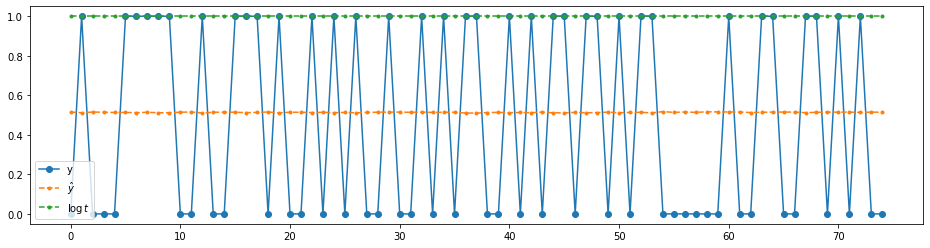

In [213]:
model = LogisticRegressionGD(lr=0.01)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습**

In [214]:
history = model.fit(X_train, y_train, epochs=10, show_params=True)

[Epoch 0] loss: 0.7  acc: 0.53
[-0.02110863  0.01562521 -0.00077375  0.00589415 -0.00259779]
[Epoch 1] loss: 0.69  acc: 0.53
[-0.01956529  0.01361344  0.00584033  0.00853126 -0.00276579]
[Epoch 2] loss: 0.69  acc: 0.56
[-0.01834052  0.01143777  0.01225447  0.01110857 -0.00298954]
[Epoch 3] loss: 0.68  acc: 0.99
[-0.01739477  0.00912024  0.01849021  0.01363217 -0.00326189]
[Epoch 4] loss: 0.68  acc: 1.0
[-0.01669315  0.00668024  0.02456654  0.01610741 -0.0035765 ]
[Epoch 5] loss: 0.67  acc: 1.0
[-0.016205    0.00413481  0.0305002   0.01853903 -0.00392781]
[Epoch 6] loss: 0.67  acc: 1.0
[-0.01590336  0.00149891  0.03630594  0.02093119 -0.00431095]
[Epoch 7] loss: 0.66  acc: 1.0
[-0.01576459 -0.00121435  0.04199671  0.02328756 -0.00472164]
[Epoch 8] loss: 0.66  acc: 0.99
[-0.01576792 -0.00399345  0.04758389  0.02561136 -0.0051561 ]
[Epoch 9] loss: 0.65  acc: 0.99
[-0.01589517 -0.00682834  0.05307749  0.02790544 -0.00561106]


### **학습 후 성능평가**

성능:  (0.6541891497801454, 0.9866666666666667)


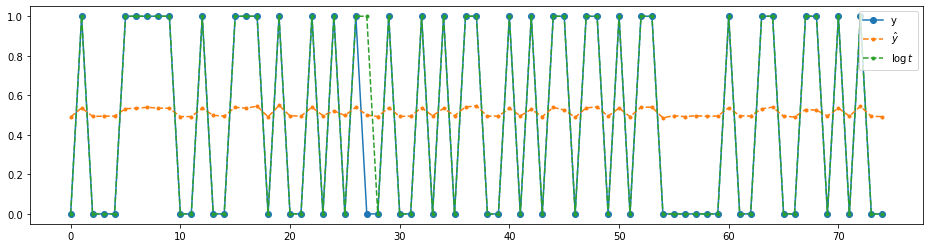

In [215]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

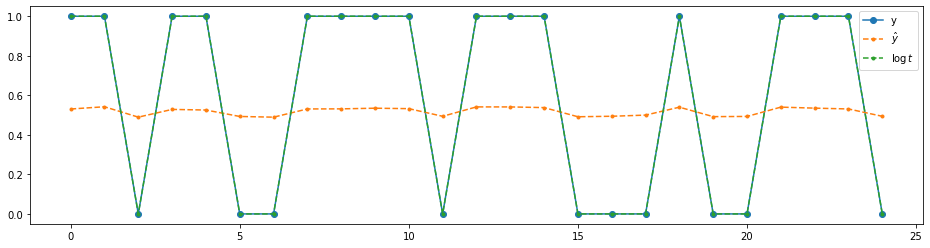

In [216]:
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

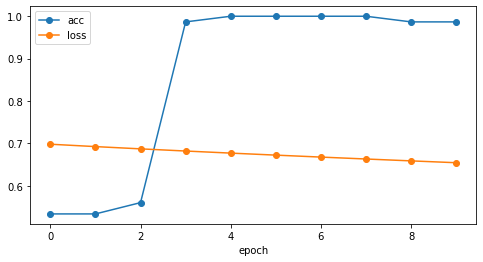

In [217]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [218]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    model = LogisticRegressionGD(lr=lr)
    history = model.fit(X_train, y_train, epochs=10)
    print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.7  acc: 0.47
[Epoch 1] loss: 0.7  acc: 0.47
[Epoch 2] loss: 0.7  acc: 0.47
[Epoch 3] loss: 0.7  acc: 0.47
[Epoch 4] loss: 0.7  acc: 0.47
[Epoch 5] loss: 0.7  acc: 0.47
[Epoch 6] loss: 0.7  acc: 0.47
[Epoch 7] loss: 0.7  acc: 0.47
[Epoch 8] loss: 0.7  acc: 0.47
[Epoch 9] loss: 0.7  acc: 0.47
===== lr 1e-05 ==== (0.6898147140126283, 0.6)
[Epoch 0] loss: 0.7  acc: 0.47
[Epoch 1] loss: 0.7  acc: 0.47
[Epoch 2] loss: 0.7  acc: 0.47
[Epoch 3] loss: 0.7  acc: 0.47
[Epoch 4] loss: 0.7  acc: 0.47
[Epoch 5] loss: 0.7  acc: 0.47
[Epoch 6] loss: 0.7  acc: 0.47
[Epoch 7] loss: 0.7  acc: 0.47
[Epoch 8] loss: 0.7  acc: 0.47
[Epoch 9] loss: 0.7  acc: 0.47
===== lr 0.0001 ==== (0.6892937834986729, 0.6)
[Epoch 0] loss: 0.7  acc: 0.47
[Epoch 1] loss: 0.7  acc: 0.47
[Epoch 2] loss: 0.7  acc: 0.47
[Epoch 3] loss: 0.7  acc: 0.47
[Epoch 4] loss: 0.69  acc: 0.47
[Epoch 5] loss: 0.69  acc: 0.47
[Epoch 6] loss: 0.69  acc: 0.47
[Epoch 7] loss: 0.69  acc: 0.47
[Epoch 8] loss: 0.69  acc: 0.47
[Ep